# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&appid="+weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | wailua homesteads
Processing Record 3 of Set 1 | invercargill
Processing Record 4 of Set 1 | williams lake
Processing Record 5 of Set 1 | manpur
Processing Record 6 of Set 1 | port mathurin
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | konotop
Processing Record 10 of Set 1 | leskova dolina
Processing Record 11 of Set 1 | bor
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | lata
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | olonkinbyen
Processing Record 16 of Set 1 | ailuk
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | atar
Processing Record 21 of Set 1 | port-aux-francais
Processing Record 22 of Set 1 | ushuaia
Processi

In [23]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [24]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,thompson,55.7435,-97.8558,-15.62,97,88,2.49,CA,1708172041
1,wailua homesteads,22.0669,-159.3780,18.44,61,100,5.66,US,1708172042
2,invercargill,-46.4000,168.3500,15.01,82,94,0.45,NZ,1708171866
3,williams lake,52.1415,-122.1445,-12.19,93,56,0.89,CA,1708172043
4,manpur,22.4333,75.6167,28.94,21,9,3.22,IN,1708172044


In [25]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [26]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,thompson,55.7435,-97.8558,-15.62,97,88,2.49,CA,1708172041
1,wailua homesteads,22.0669,-159.3780,18.44,61,100,5.66,US,1708172042
2,invercargill,-46.4000,168.3500,15.01,82,94,0.45,NZ,1708171866
3,williams lake,52.1415,-122.1445,-12.19,93,56,0.89,CA,1708172043
4,manpur,22.4333,75.6167,28.94,21,9,3.22,IN,1708172044


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

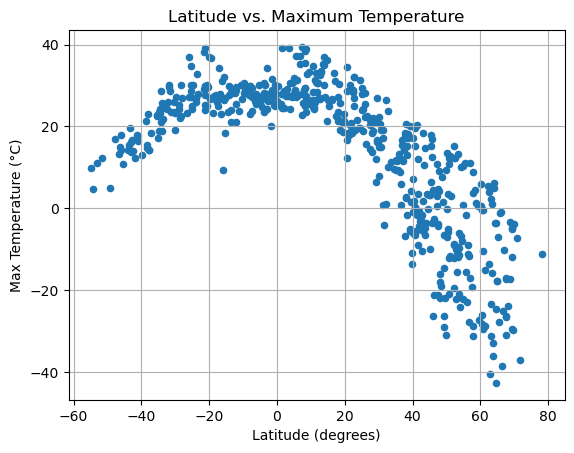

In [27]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x='Lat', y='Max Temp', grid=True)

# Incorporate the other graph properties
plt.xlabel('Latitude (degrees)')
plt.ylabel('Max Temperature (°C)')
plt.title('Latitude vs. Maximum Temperature')

# Save the figure
plt.savefig("output_data/ScatterPlot_Latitude_vs._Temperature.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

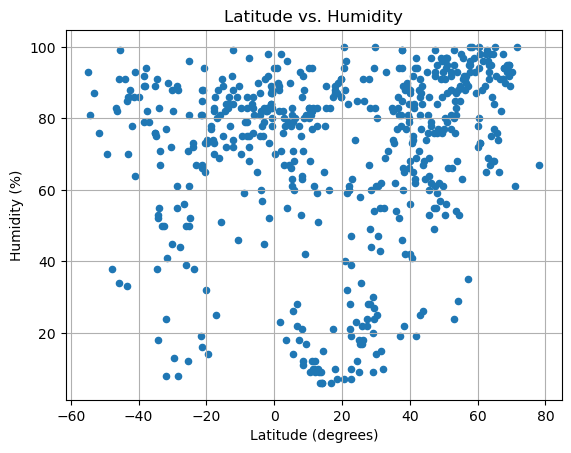

In [28]:
# Build scatter plot for latitude vs. Humidity
city_data_df.plot.scatter(x='Lat', y='Humidity', grid=True)

# Incorporate the other graph properties
plt.xlabel('Latitude (degrees)')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Humidity')

# Save the figure
plt.savefig("output_data/ScatterPlot_Latitude_vs._Humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

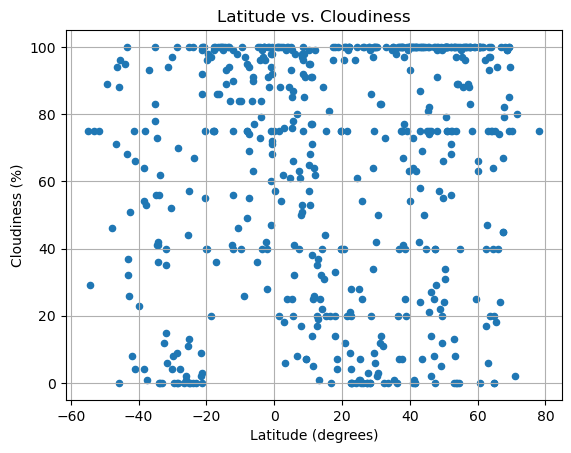

In [30]:
# Build scatter plot for latitude vs. Cloudiness
city_data_df.plot.scatter(x='Lat', y='Cloudiness', grid=True)

# Incorporate the other graph properties
plt.xlabel('Latitude (degrees)')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs. Cloudiness')

# Save the figure
plt.savefig("output_data/ScatterPlot_Latitude_vs.Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

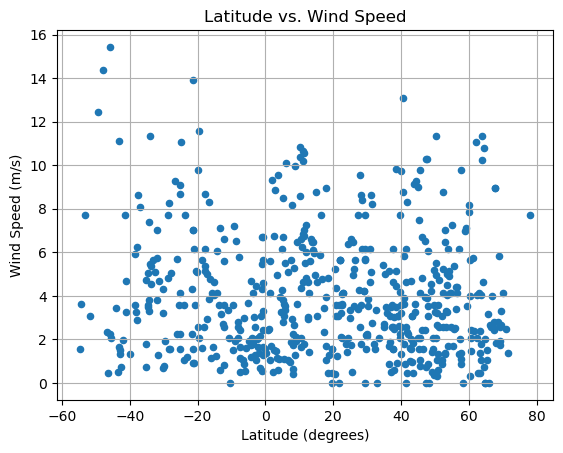

In [31]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x='Lat', y='Wind Speed', grid=True)

# Incorporate the other graph properties
plt.xlabel('Latitude (degrees)')
plt.ylabel('Wind Speed (m/s)')
plt.title('Latitude vs. Wind Speed')

# Save the figure
plt.savefig("output_data/ScatterPlot_Latitude_vs.WindSpeed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots


In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.read_csv("output_data/cities.csv", index_col="Lat")
northern_hemi_df = northern_hemi_df[northern_hemi_df.index > 0]

# Display sample data
northern_hemi_df.head()

,City_ID,City,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
Lat,,,,,,,,,
55.7435,0,thompson,-97.8558,-15.62,97,88,2.49,CA,1708172041
22.0669,1,wailua homesteads,-159.3780,18.44,61,100,5.66,US,1708172042
52.1415,3,williams lake,-122.1445,-12.19,93,56,0.89,CA,1708172043
22.4333,4,manpur,75.6167,28.94,21,9,3.22,IN,1708172044
51.2403,8,konotop,33.2026,2.90,66,100,4.71,UA,1708171812


In [33]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.read_csv("output_data/cities.csv", index_col="Lat")
southern_hemi_df = southern_hemi_df[southern_hemi_df.index < 0]

# Display sample data
southern_hemi_df.head()

,City_ID,City,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
Lat,,,,,,,,,
-46.4000,2,invercargill,168.3500,15.01,82,94,0.45,NZ,1708171866
-19.6833,5,port mathurin,63.4167,26.77,73,96,11.55,MU,1708172044
-25.0660,6,adamstown,-130.1015,24.31,81,100,4.13,PN,1708172045
-43.0167,7,blackmans bay,147.3167,16.07,86,32,1.49,AU,1708172046
-37.6167,13,lebu,-73.6500,14.19,82,1,8.61,CL,1708172049


###  Temperature vs. Latitude Linear Regression Plot

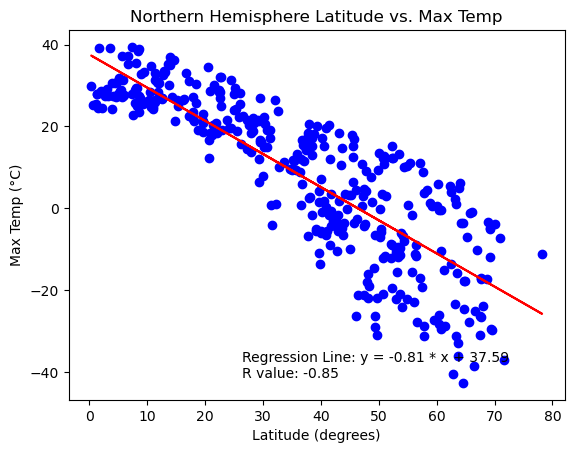

In [34]:
# Linear regression on Northern Hemisphere

# Latitude and Max Temp x and y values
x_values_northern = northern_hemi_df.index
y_values_northern = northern_hemi_df['Max Temp']

# Linear regression calc for Southern Hemisphere
slope_northern, intercept_northern, r_value_northern, p_value_northern, std_err_northern = linregress(x_values_northern, y_values_northern)

# Scatter plot
plt.scatter(x_values_northern, y_values_northern, color='blue', label='Data')

# Plot regression line for Southern Hemisphere
plt.plot(x_values_northern, slope_northern * x_values_northern + intercept_northern, color='red', label='Linear Regression')

# Add chart features
plt.text(0.35, 0.05, f'Regression Line: y = {slope_northern:.2f} * x + {intercept_northern:.2f}\nR value: {r_value_northern:.2f}', 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='left')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Max Temp (°C)')
plt.title('Northern Hemisphere Latitude vs. Max Temp')

#Save
plt.savefig("output_data/Northern_Hemisphere_Latitude_vs._Max_Temp.png")

# Show plot
plt.show()

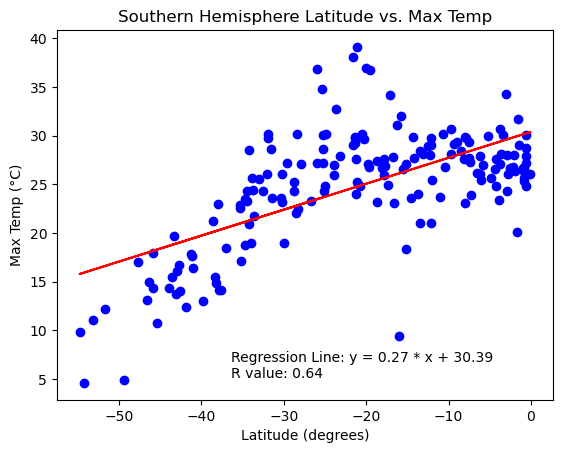

In [17]:
# Linear regression on Southern Hemisphere

# Latitude and Max Temp x and y values
x_values_southern = southern_hemi_df.index
y_values_southern = southern_hemi_df['Max Temp']

# Linear regression calc for Southern Hemisphere
slope_southern, intercept_southern, r_value_southern, p_value_southern, std_err_southern = linregress(x_values_southern, y_values_southern)

# Scatter plot
plt.scatter(x_values_southern, y_values_southern, color='blue', label='Data')

# Plot regression line for Southern Hemisphere
plt.plot(x_values_southern, slope_southern * x_values_southern + intercept_southern, color='red', label='Linear Regression')

# Add chart features
plt.text(0.35, 0.05, f'Regression Line: y = {slope_southern:.2f} * x + {intercept_southern:.2f}\nR value: {r_value_southern:.2f}', 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='left')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Max Temp (°C)')
plt.title('Southern Hemisphere Latitude vs. Max Temp')

#Save
plt.savefig("output_data/Southern Hemisphere_Latitude_vs._Max_Temp.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

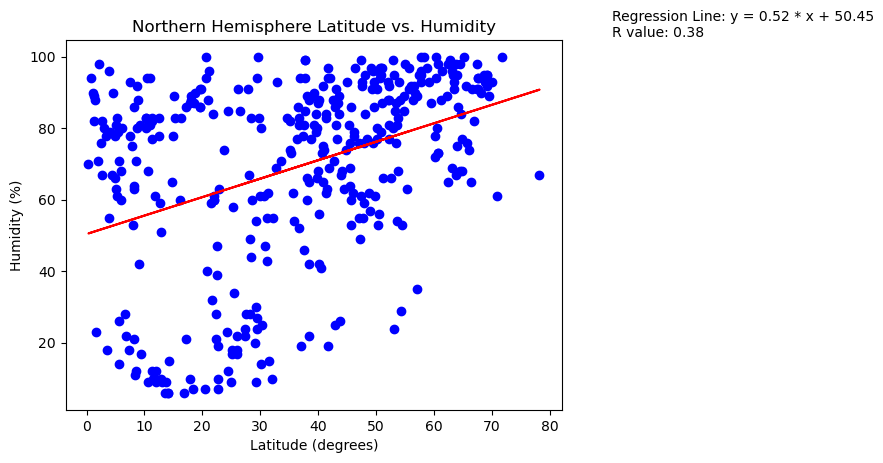

In [35]:
# Linear regression on Northern Hemisphere

# Latitude and Humidity x and y values
x_values = northern_hemi_df.index
y_values = northern_hemi_df['Humidity']

# Linear regression calc
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Scatter plot
plt.scatter(x_values, y_values, color='blue', label='Data')

# Plot regression line
plt.plot(x_values, slope * x_values + intercept, color='red', label='Linear Regression')

# Add chart features
plt.text(1.1, 1.0, f'Regression Line: y = {slope:.2f} * x + {intercept:.2f}\nR value: {r_value:.2f}', 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='left')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere Latitude vs. Humidity')

#Save
plt.savefig("output_data/Northern_Hemisphere_Latitude_vs._Humidity.png")

# Show plot
plt.show()

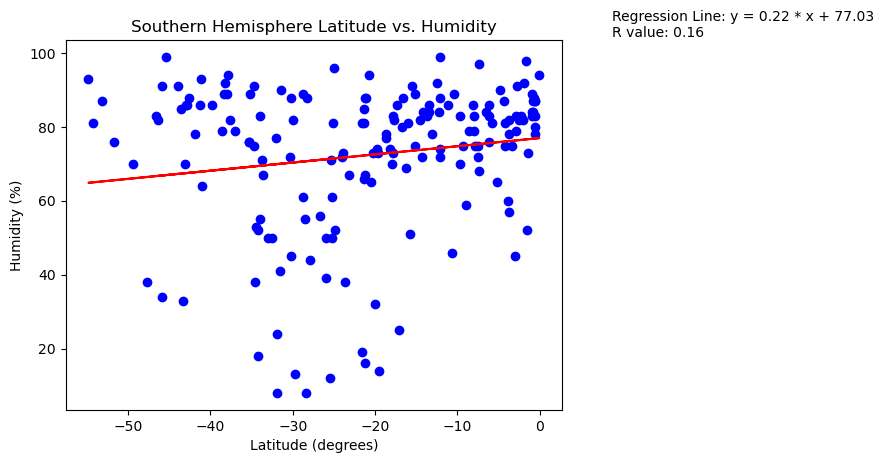

In [19]:
# Linear regression on Southern Hemisphere

# Latitude and Humidity x and y values
x_values_southern = southern_hemi_df.index
y_values_southern = southern_hemi_df['Humidity']

# Linear regression calc
slope_southern, intercept_southern, r_value_southern, p_value_southern, std_err_southern = linregress(x_values_southern, y_values_southern)

# Scatter plot
plt.scatter(x_values_southern, y_values_southern, color='blue', label='Data')

# Plot regression line
plt.plot(x_values_southern, slope_southern * x_values_southern + intercept_southern, color='red', label='Linear Regression')

# Add chart features
plt.text(1.1, 1.0, f'Regression Line: y = {slope_southern:.2f} * x + {intercept_southern:.2f}\nR value: {r_value_southern:.2f}', 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='left')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere Latitude vs. Humidity')

#Save
plt.savefig("output_data/Southern Hemisphere_Latitude_vs._Humidity.png")

# Show plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

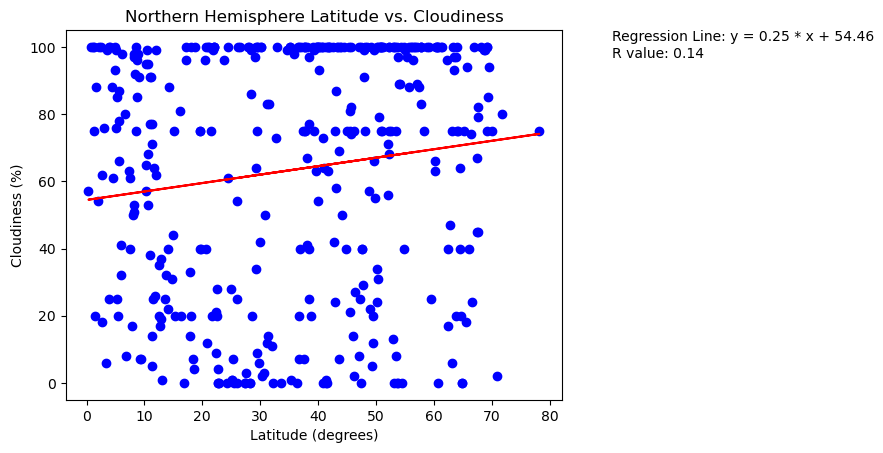

In [36]:
# Linear regression on Northern Hemisphere

# Latitude and Cloudiness x and y values
x_values_northern = northern_hemi_df.index
y_values_northern = northern_hemi_df['Cloudiness']

# Linear regression calc
slope_northern, intercept_northern, r_value_northern, p_value_northern, std_err_northern = linregress(x_values_northern, y_values_northern)

# Scatter plot
plt.scatter(x_values_northern, y_values_northern, color='blue', label='Data')

# Plot regression line
plt.plot(x_values_northern, slope_northern * x_values_northern + intercept_northern, color='red', label='Linear Regression')

# Add chart features
plt.text(1.1, 1.0, f'Regression Line: y = {slope_northern:.2f} * x + {intercept_northern:.2f}\nR value: {r_value_northern:.2f}', 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', horizontalalignment='left')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere Latitude vs. Cloudiness')

#Save
plt.savefig("output_data/Northern_Hemisphere_Latitude_vs._Cloudiness.png")

# Show plot
plt.show()


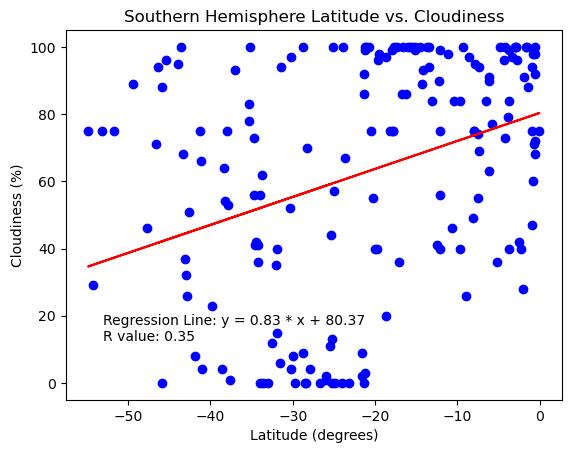

In [21]:
# Linear regression on Southern Hemisphere

# Latitude and Cloudiness x and y values
x_values_southern = southern_hemi_df.index
y_values_southern = southern_hemi_df['Cloudiness']

# Linear regression calc
slope_southern, intercept_southern, r_value_southern, p_value_southern, std_err_southern = linregress(x_values_southern, y_values_southern)

# Scatter plot
plt.scatter(x_values_southern, y_values_southern, color='blue', label='Data')

# Plot regression line
plt.plot(x_values_southern, slope_southern * x_values_southern + intercept_southern, color='red', label='Linear Regression')

# Add chart features
plt.text(0.075, 0.15, f'Regression Line: y = {slope_southern:.2f} * x + {intercept_southern:.2f}\nR value: {r_value_southern:.2f}', 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='left')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere Latitude vs. Cloudiness')

#Save
plt.savefig("output_data/Southern_Hemisphere_Latitude_vs._Cloudiness.png")

# Show plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

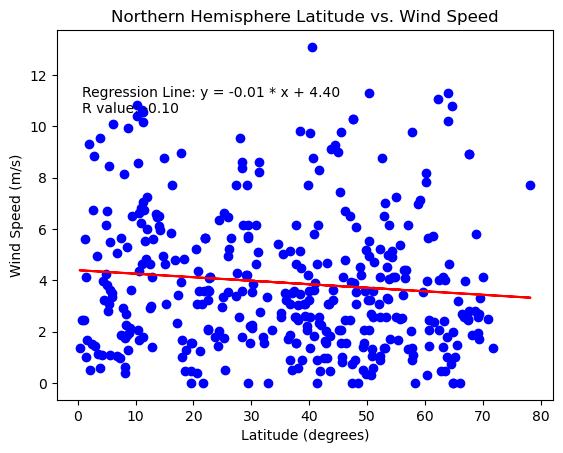

In [37]:
# Linear regression on Northern Hemisphere

# Latitude and Wind Speed x and y values
x_values_northern = northern_hemi_df.index
y_values_northern = northern_hemi_df['Wind Speed']

# Linear regression calc
slope_northern, intercept_northern, r_value_northern, p_value_northern, std_err_northern = linregress(x_values_northern, y_values_northern)

# Scatter plot
plt.scatter(x_values_northern, y_values_northern, color='blue', label='Data')

# Plot regression line
plt.plot(x_values_northern, slope_northern * x_values_northern + intercept_northern, color='red', label='Linear Regression')

# Add chart features
plt.text(0.05, 0.85, f'Regression Line: y = {slope_northern:.2f} * x + {intercept_northern:.2f}\nR value: {r_value_northern:.2f}', 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', horizontalalignment='left')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Wind Speed (m/s)')
plt.title('Northern Hemisphere Latitude vs. Wind Speed')

#Save
plt.savefig("output_data/Northern_Hemisphere_Latitude_vs._Wind_Speed.png")


# Show plot
plt.show()


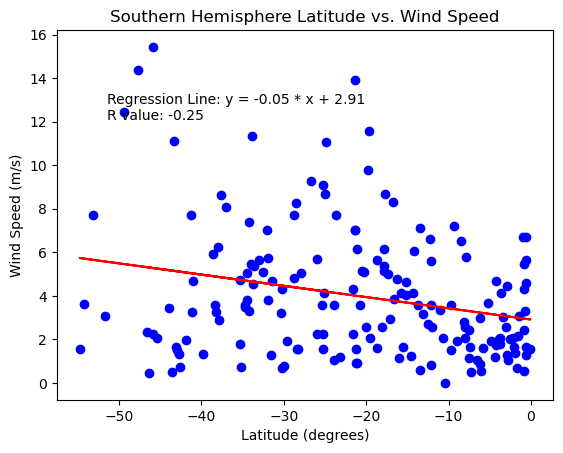

In [38]:
# Linear regression on Southern Hemisphere

# Latitude and Wind Speed x and y values
x_values_southern = southern_hemi_df.index
y_values_southern = southern_hemi_df['Wind Speed']

# Linear regression calc
slope_southern, intercept_southern, r_value_southern, p_value_southern, std_err_southern = linregress(x_values_southern, y_values_southern)

# Scatter plot
plt.scatter(x_values_southern, y_values_southern, color='blue', label='Data')

# Plot regression line
plt.plot(x_values_southern, slope_southern * x_values_southern + intercept_southern, color='red', label='Linear Regression')

# Add chart features
plt.text(.1, .75, f'Regression Line: y = {slope_southern:.2f} * x + {intercept_southern:.2f}\nR value: {r_value_southern:.2f}', 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='left')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Wind Speed (m/s)')
plt.title('Southern Hemisphere Latitude vs. Wind Speed')

#Save
plt.savefig("output_data/Southern_Hemisphere_Latitude_vs._Wind_Speed.png")

# Show plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE